In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix ,  f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from scipy.stats import multivariate_normal
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron


## 1. Chargement des données

In [3]:
df = pd.read_csv('loan_data.csv')
df

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

## Correspondances au métier



    credit.policy : Cette variable binaire (0 ou 1) indique si un emprunteur répond aux critères de politique de crédit établis par l'institution prêteuse. Si la valeur est 1, cela signifie que l'emprunteur respecte les critères, sinon, c'est 0.

    purpose : Cette variable indique la raison ou le but de la demande de prêt. Par exemple, cela pourrait être "consolidation de dette", "éducation", "petite entreprise", etc.

    int.rate : C'est le taux d'intérêt du prêt, généralement exprimé sous forme de pourcentage. Il représente le coût du prêt pour l'emprunteur.

    installment : Il s'agit du montant des paiements mensuels que l'emprunteur doit effectuer pour rembourser le prêt. Il est généralement fixe pendant la durée du prêt.

    log.annual.inc : C'est le revenu annuel de l'emprunteur, mais il est généralement pris en compte sous une forme logarithmique. Cela peut être utilisé pour évaluer la capacité de remboursement de l'emprunteur.

    dti : Le ratio de la dette sur le revenu, qui mesure la proportion du revenu de l'emprunteur qui est consacrée au remboursement de la dette. Plus le ratio est élevé, plus la dette est importante par rapport au revenu.

    fico : Le score FICO de l'emprunteur, un score de crédit qui évalue la solvabilité de l'emprunteur. Plus le score est élevé, meilleure est la solvabilité.

    days.with.cr.line : Le nombre de jours pendant lesquels l'emprunteur a eu une ligne de crédit. Cela peut être un indicateur de l'expérience de crédit de l'emprunteur.

    revol.bal : Le solde actuel sur les comptes de carte de crédit de l'emprunteur. Cela représente la dette actuelle sur les cartes de crédit.

    revol.util : Le taux d'utilisation du crédit, qui indique la proportion de la limite de crédit utilisée par l'emprunteur. Un taux d'utilisation élevé peut signaler un risque de crédit plus élevé.

    inq.last.6mths : Le nombre de requêtes de crédit effectuées au cours des 6 derniers mois. Cela peut indiquer l'activité récente de demande de crédit de l'emprunteur.

    delinq.2yrs : Le nombre de paiements en retard de plus de 30 jours au cours des 2 dernières années. Cela reflète les antécédents de paiement de l'emprunteur.

    pub.rec : Le nombre d'articles publics négatifs sur le crédit de l'emprunteur. Cela peut inclure des éléments tels que les faillites ou les jugements.

    not.fully.paid : Cette variable binaire (0 ou 1) indique si l'emprunteur n'a pas complètement remboursé le prêt. Si la valeur est 1, cela signifie que le prêt n'a pas été entièrement remboursé, sinon, c'est 0.

## 2. Découverte des données


In [4]:
# Informations sur les types de données, les valeurs manquantes...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
selected_rows = df[(df['credit.policy'] == 0) & (df['not.fully.paid'] == 0)]
print(selected_rows)

      credit.policy             purpose  int.rate  installment  \
7710              0  debt_consolidation    0.1608        35.20   
7712              0  debt_consolidation    0.1600       787.53   
7716              0  debt_consolidation    0.1380       149.96   
7718              0  debt_consolidation    0.1703       570.69   
7719              0         credit_card    0.1324       404.03   
...             ...                 ...       ...          ...   
9561              0           all_other    0.0788       115.74   
9562              0  debt_consolidation    0.1348       508.87   
9564              0           all_other    0.1385       511.56   
9567              0           all_other    0.1311       101.24   
9568              0           all_other    0.1979        37.06   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
7710       10.308953  23.84   642        2490.000000      10125        90.4   
7712       11.264464  19.34   682        3780.041

In [6]:
df.describe()


credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [7]:
df.isnull().sum().sum()


0

**Affichage de valeurs de purpose**

In [8]:
df.purpose.value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

## 3. Prétraitement des données

Ajuster le codeur aux données de la colonne 'purpose' et transformer les valeurs de cette colonne en nombres entiers, leur attribuant un code numérique unique en fonction de leurs catégories.

In [9]:
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df.head()

credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
0              1        2    0.1189       829.10       11.350407  19.48   737   
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  
0        0               0  
1        0               0  
2        0               0  
3        0               0  
4        0               0

In [10]:
df.purpose.value_counts()

purpose
2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: count, dtype: int64

## 4. Visualisation des données 

### 1. Histogrammes de distribution du score FICO

Deux histogrammes  montrant la distribution des cotes FICO pour deux groupes distincts d'emprunteurs : ceux qui répondent (ou non) à la politique de crédit spécifiée (1 ou 0). Cela permet de visualiser visuellement les différences dans la distribution des cotes FICO entre les deux groupes.

Text(0.5, 0, 'FICO')

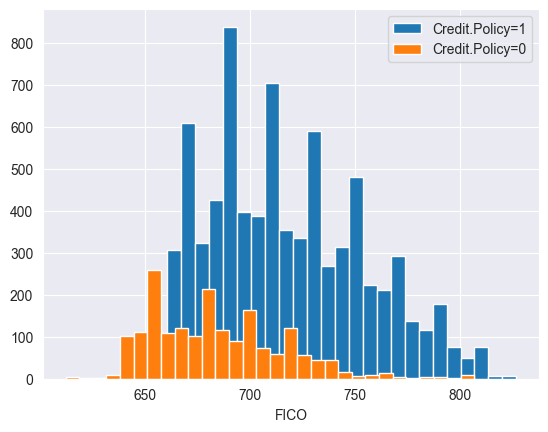

In [11]:
sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Ce graphique permet de comparer visuellement la distribution des cotes FICO entre les emprunteurs ayant complètement remboursé leur prêt (not.fully.paid=0) et ceux qui ne l'ont pas entièrement remboursé (not.fully.paid=1). Les couleurs et la transparence des barres permettent de distinguer les deux distributions dans l'histogramme.

Text(0.5, 0, 'FICO')

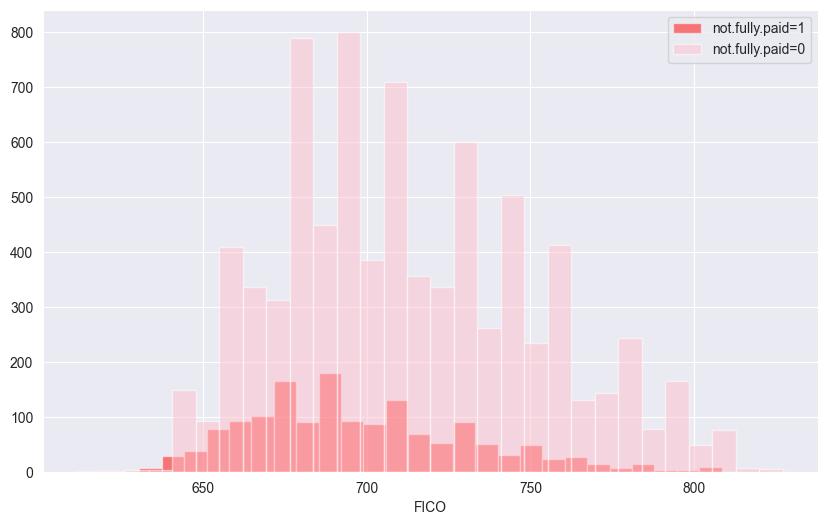

In [12]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='red', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='pink', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Dans ce graphe on peut remarquer qu'on a un désequilibre au niveau des classes, ce qui risque d'influencer nos modèles.

### 2. Occurences des purposes

Ce graphique countplot permet de visualiser le nombre d'occurrences pour chaque objectif de prêt, tout en distinguant visuellement le statut de remboursement pour chaque objectif grâce à la différenciation des couleurs ou des groupes (dépendant de hue='not.fully.paid'). Cela permet de comprendre la répartition des objectifs de prêt en fonction du statut de remboursement.

<Axes: xlabel='purpose', ylabel='count'>

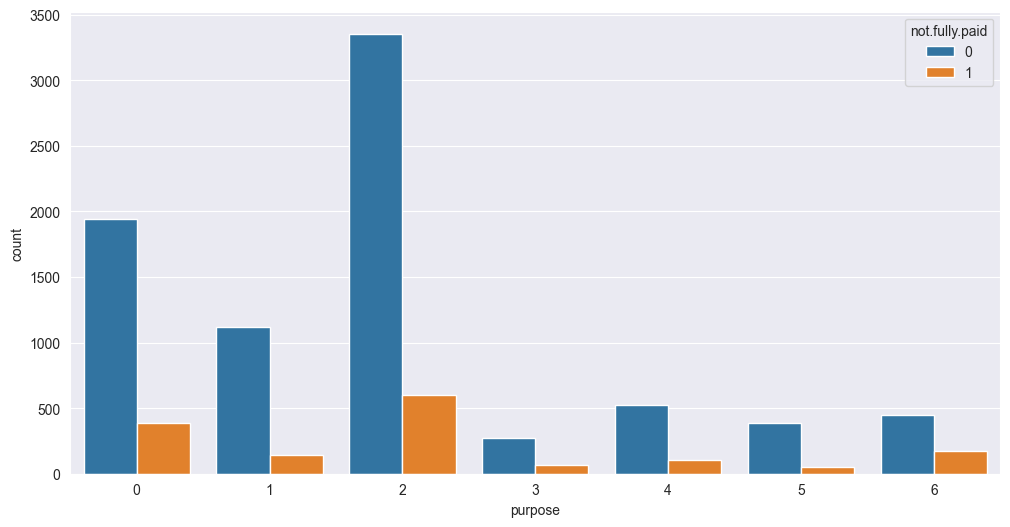

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

### 3.Visualisation de la relation entre le taux d'intérêts et le score FICO

Ce type de graphique jointplot affiche à la fois un nuage de points pour représenter la relation entre les deux variables et les distributions univariées le long de chaque axe. Cela permet d'observer à la fois la corrélation entre les cotes FICO et les taux d'intérêt, ainsi que la distribution individuelle de ces variables.

<Figure size 1000x600 with 0 Axes>

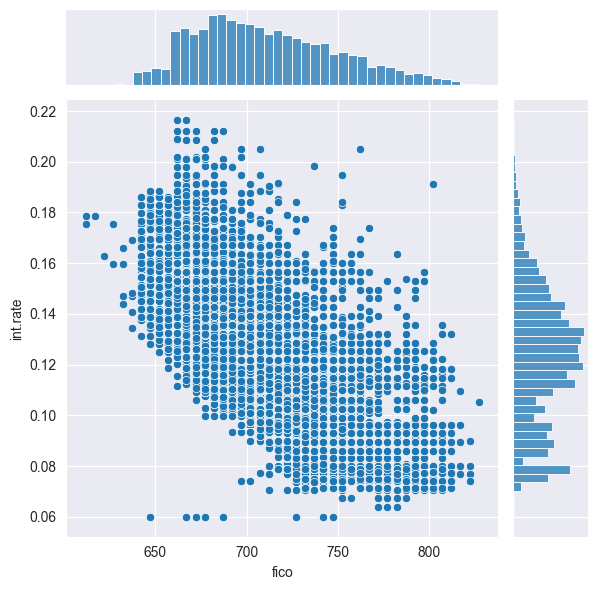

In [15]:
plt.figure(figsize=(10,6))
sns.jointplot(x='fico', y='int.rate', data=df)

 Une grille de graphiques où chaque graphique montre la relation entre les cotes FICO et les taux d'intérêt pour différentes valeurs de not.fully.paid. Chaque graphique serait également différencié par la politique de crédit avec des couleurs distinctes, permettant de visualiser la relation entre ces variables selon ces différentes conditions.

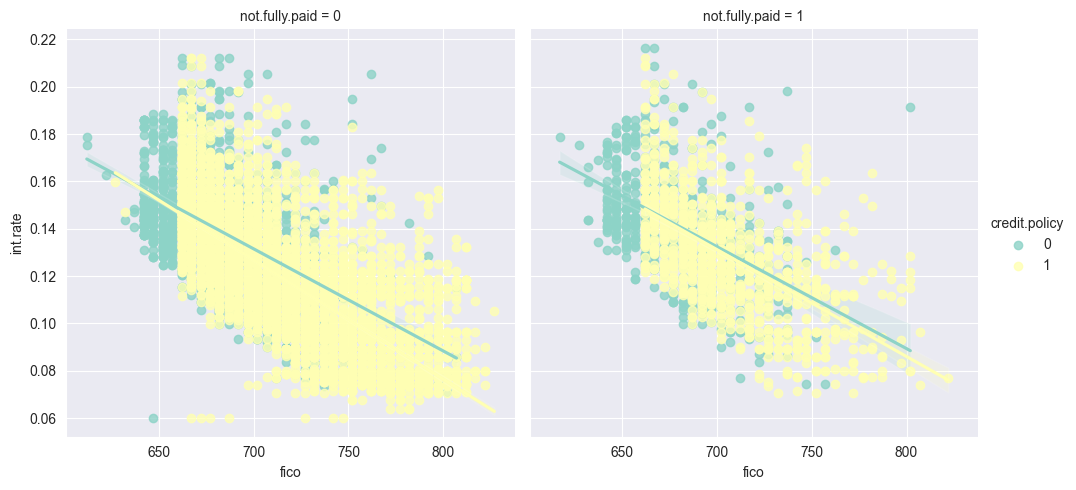

In [16]:
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set3')

### 4. Matrice de corrélation

Une carte de chaleur affichant une grille de couleurs où les nuances représentent les différents niveaux de corrélation entre les variables. Les valeurs plus proches de 1 indiquent une corrélation positive, tandis que celles proches de -1 indiquent une corrélation négative. Les zones plus claires ou plus foncées indiquent une corrélation plus forte, et les valeurs annotées dans chaque cellule fournissent les mesures précises de corrélation entre les paires de variables. Cela permet de visualiser rapidement quelles variables sont fortement corrélées entre elles.

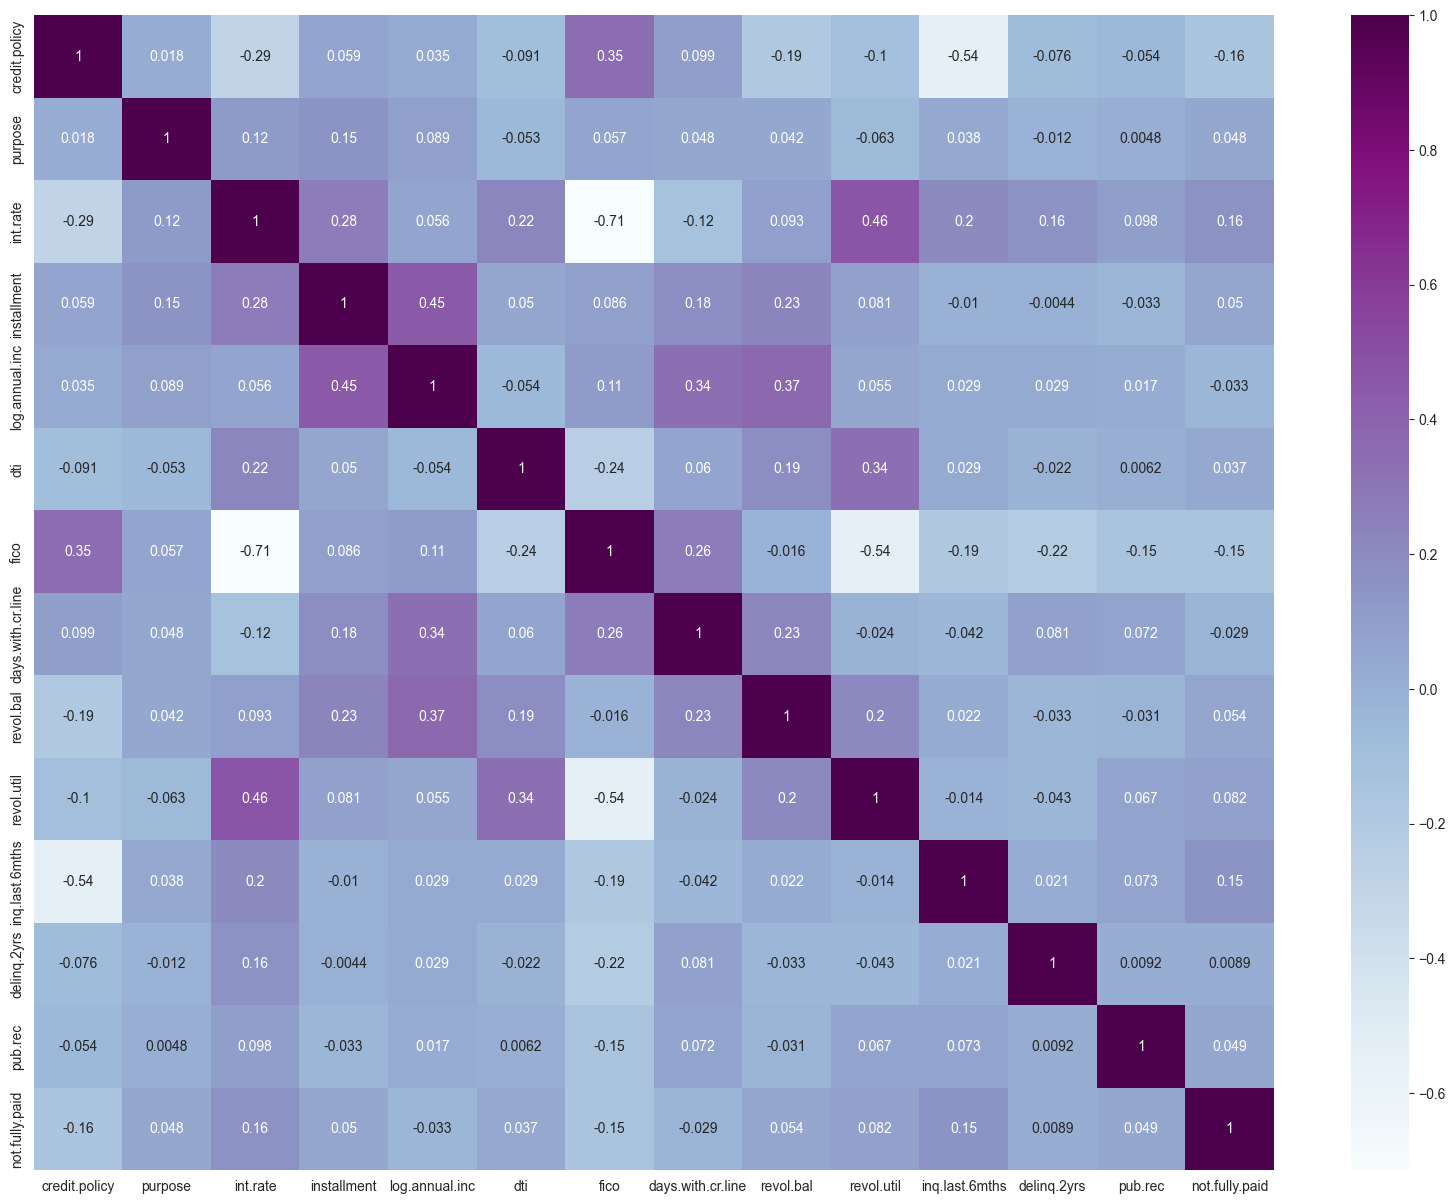

In [17]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.show()


## 5. Split des données

### Séparation et Répartition de données (80% pour l'apprentissage  et 20% pour les tests, avec une graine aléatoire fixée à 42 pour assurer la reproductibilité des résultats )

In [18]:

X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']
feature_columns = ['fico', 'int.rate' , 'dti' , 'log.annual.inc' ,'inq.last.6mths', 'installment','days.with.cr.line', 'revol.bal', 'revol.util' , 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
X = df[feature_columns].values
y = df['not.fully.paid'].values
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 6. Modèles ML

### 1. K-NN


Le principe du classificateur k-NN (k-Nearest Neighbors) repose sur l'idée que des données similaires ont tendance à se regrouper dans l'espace des caractéristiques. Pour prédire la classe d'un nouvel échantillon, le k-NN regarde les k voisins les plus proches de cet échantillon dans l'espace des caractéristiques (mesuré généralement par la distance euclidienne) et attribue la classe majoritaire parmi ces k voisins au nouvel échantillon.


In [19]:
df.head()

credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
0              1        2    0.1189       829.10       11.350407  19.48   737   
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  
0        0               0  
1        0               0  
2        0               0  
3        0               0  
4        0               0

Précision du classifieur k-NN : 0.79


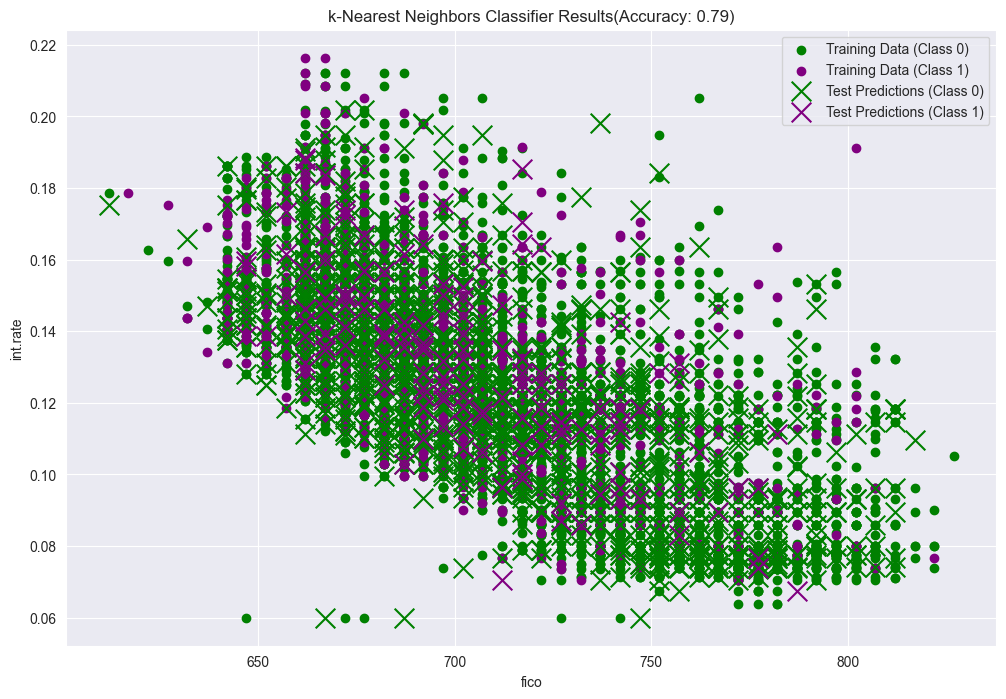

In [20]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

predictions = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Précision du classifieur k-NN : {accuracy:.2f}")

plt.figure(figsize=(12, 8))

plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='green', marker='o', label='Training Data (Class 0)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='purple', marker='o', label='Training Data (Class 1)')

plt.scatter(X_test[predictions == 0, 0], X_test[predictions == 0, 1], c='green', marker='x', s=200, label='Test Predictions (Class 0)')
plt.scatter(X_test[predictions == 1, 0], X_test[predictions == 1, 1], c='purple', marker='x', s=200, label='Test Predictions (Class 1)')

plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
plt.legend()
plt.title(f'k-Nearest Neighbors Classifier Results(Accuracy: {accuracy:.2f})')
plt.show()


La représentation graphique montre la répartition des données d'apprentissage et des prédictions du modèle sur l'ensemble de test. Les points représentent les données d'apprentissage et les prédictions du modèle, différenciés par couleur en fonction de leur classe prédite ('not fully paid' ou non).

L'accuracy de 0.79 (ou 79%) obtenue indique que le modèle a correctement prédit environ 79% des étiquettes de classe 'not fully paid' dans l'ensemble de test par rapport aux valeurs réelles

### Evaluation 

In [22]:
accuracy_KNN = accuracy_score(y_test, predictions)
print(f"Accuracy du classifieur k-NN : {accuracy_KNN:.2f}")

precision_KNN = precision_score(y_test, predictions)
print(f"Précision du classifieur k-NN : {precision_KNN:.2f}")

recall_KNN = recall_score(y_test, predictions)
print(f"Rappel du classifieur k-NN : {recall_KNN:.2f}")

f1_KNN = f1_score(y_test, predictions)
print(f"F1 Score du classifieur k-NN : {f1_KNN:.2f}")

Accuracy du classifieur k-NN : 0.79
Précision du classifieur k-NN : 0.20
Rappel du classifieur k-NN : 0.10
F1 Score du classifieur k-NN : 0.13


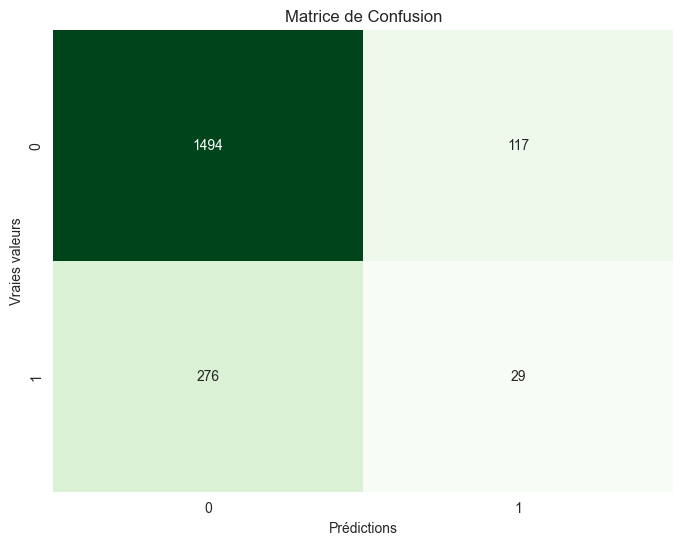

In [23]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()



La matrice de confusion est une représentation très utile pour évaluer les performances d'un modèle de classification. Elle montre le nombre de prédictions correctes et incorrectes faites par le modèle sur chaque classe.

*  Il y a 1494 vrais positifs (VP) : échantillons de la classe positive correctement prédits.

*   Il y a 117 faux négatifs (FN) : échantillons de la classe positive prédits comme négatifs.
*    Il y a 276 faux positifs (FP) : échantillons de la classe négative prédits comme positifs.
*    Il y a 29 vrais négatifs (VN) : échantillons de la classe négative correctement prédits.


Une courbe ROC est un graphique représentant la performance d'un modèle de classification à différents seuils de classification.
L'axe des x représente le taux de faux positifs (FPR - False Positive Rate), et l'axe des y représente le taux de vrais positifs (TPR - True Positive Rate),
L'AUC est la mesure de l'aire sous la courbe ROC. Elle représente la capacité du modèle à discriminer entre les classes.


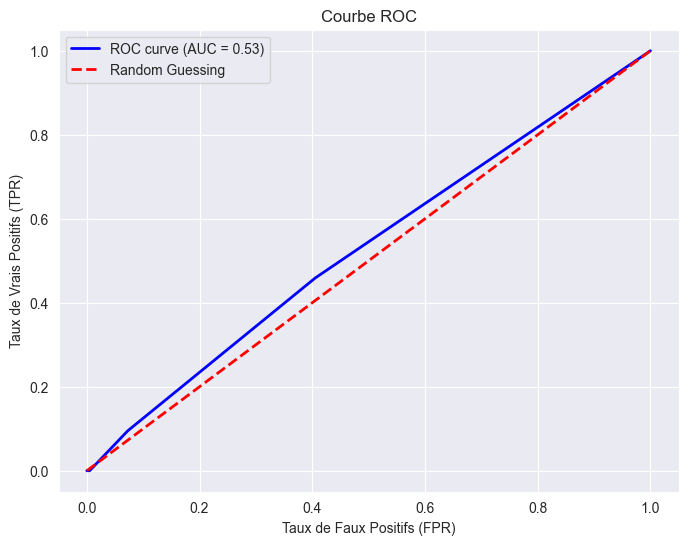

In [24]:
probabilities = knn_classifier.predict_proba(X_test)
predicted_probabilities = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()


une AUC de 0.53 indique une performance de classification modérée, mais il y a de la place pour des améliorations pour que le modèle soit plus précis et capable de mieux discriminer entre les classes.


# Classifieur bayesien


Le classifieur de Bayes est une famille de méthodes de classification probabilistes basées sur le théorème de Bayes. Son principe fondamental repose sur l'estimation des probabilités conditionnelles des classes données



Précision du classifieur Bayesien : 0.71


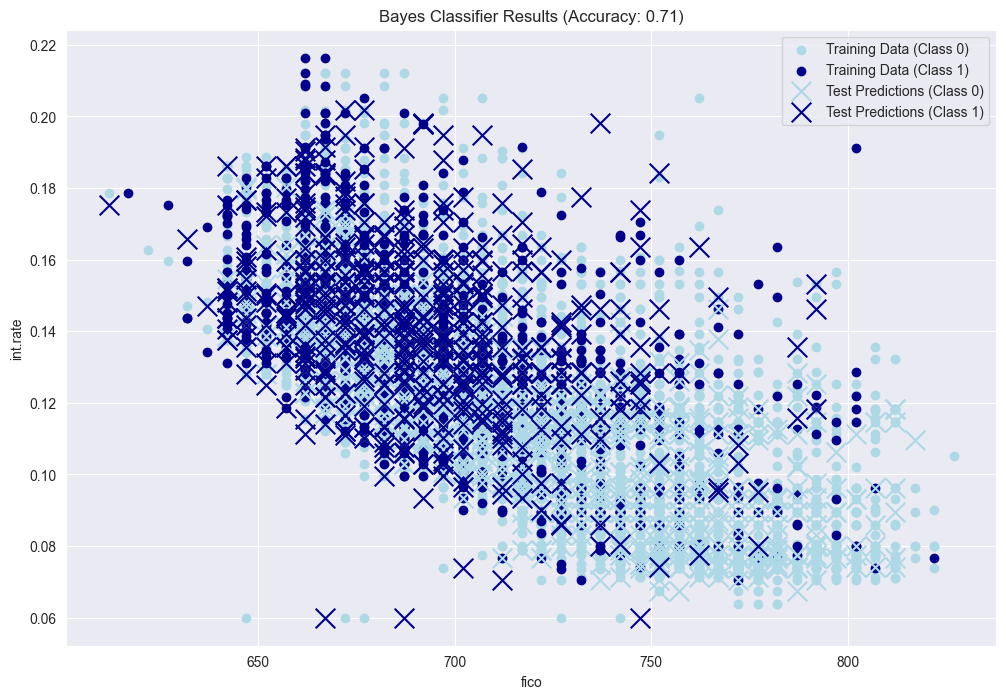

In [25]:
feature_columns = ['fico', 'int.rate' , 'dti' , 'log.annual.inc' ,'inq.last.6mths','installment','revol.util','delinq.2yrs','pub.rec']
X = df[feature_columns].values
y = df['not.fully.paid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_class_0 = X_train[y_train == 0]
X_train_class_1 = X_train[y_train == 1]
mean_class_0 = np.mean(X_train_class_0, axis=0)
covariance_class_0 = np.cov(X_train_class_0, rowvar=False)
mean_class_1 = np.mean(X_train_class_1, axis=0)
covariance_class_1 = np.cov(X_train_class_1, rowvar=False)
def non_naive_bayes_classifier(X, mean_0, covariance_0, mean_1, covariance_1):
    prob_class_0 = multivariate_normal(mean=mean_0, cov=covariance_0)
    prob_class_1 = multivariate_normal(mean=mean_1, cov=covariance_1)

    predictions = np.argmax([prob_class_0.pdf(X), prob_class_1.pdf(X)], axis=0)
    return predictions
predictions = non_naive_bayes_classifier(X_test, mean_class_0, covariance_class_0, mean_class_1, covariance_class_1)
accuracy = accuracy_score(y_test, predictions)
print(f"Précision du classifieur Bayesien : {accuracy:.2f}")
plt.figure(figsize=(12, 8))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='lightblue', marker='o', label='Training Data (Class 0)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='darkblue', marker='o', label='Training Data (Class 1)')
plt.scatter(X_test[predictions == 0, 0], X_test[predictions == 0, 1], c='lightblue', marker='x', s=200, label='Test Predictions (Class 0)')
plt.scatter(X_test[predictions == 1, 0], X_test[predictions == 1, 1], c='darkblue', marker='x', s=200, label='Test Predictions (Class 1)')

plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
plt.legend()
plt.title(f'Bayes Classifier Results (Accuracy: {accuracy:.2f})')
plt.show()


### Evaluation

In [27]:
accuracy_B = accuracy_score(y_test, predictions)
print(f"Accuracy du classifieur bayes : {accuracy_B:.2f}")
precision_B = precision_score(y_test, predictions)
print(f"Précision du classifieur bayes : {precision_B:.2f}")
recall_B = recall_score(y_test, predictions)
print(f"Rappel du classifieur bayes : {recall_B:.2f}")
f1_B = f1_score(y_test, predictions)
print(f"F1 Score du classifieur bayes : {f1_B:.2f}")

Accuracy du classifieur bayes : 0.71
Précision du classifieur bayes : 0.26
Rappel du classifieur bayes : 0.48
F1 Score du classifieur bayes : 0.34


Précision du classifieur Bayesien : 0.71


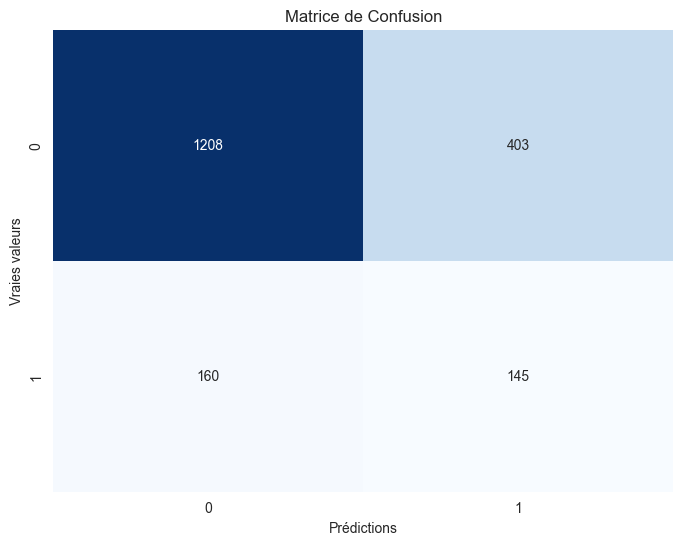

In [28]:
predictions = non_naive_bayes_classifier(X_test, mean_class_0, covariance_class_0, mean_class_1, covariance_class_1)
accuracy = accuracy_score(y_test, predictions)
print(f"Précision du classifieur Bayesien : {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()


# Classifieur Random Forest

Précision sur l'ensemble d'entraînement : 1.00
Précision sur l'ensemble de test : 0.84


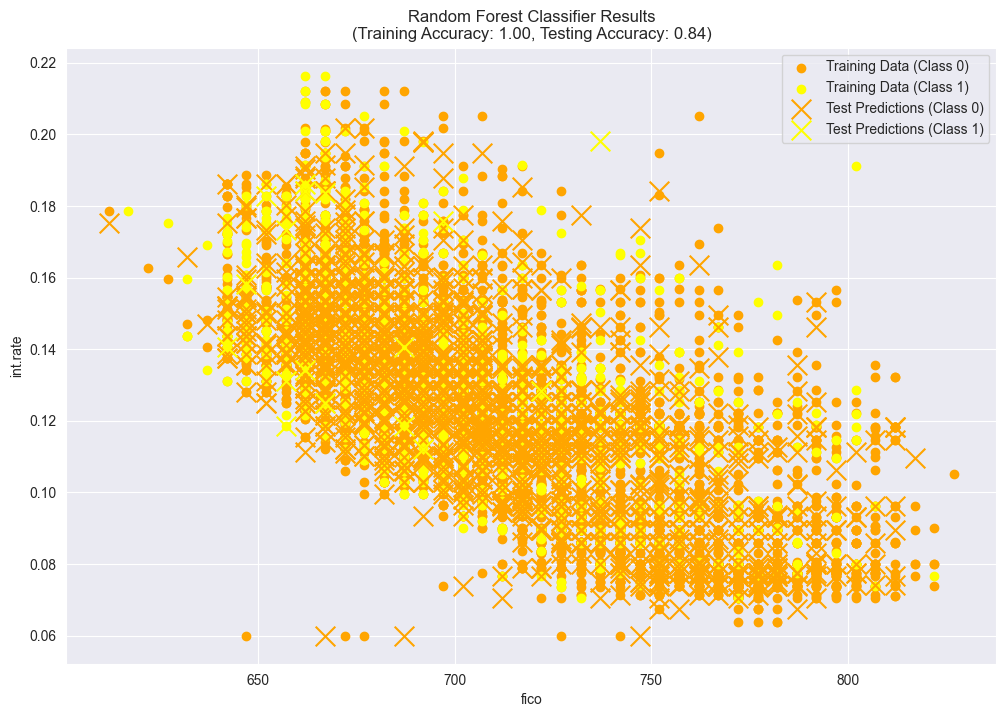

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


rf_clf = RandomForestClassifier(n_estimators=600)
rf_clf.fit(X_train, y_train)

y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Précision sur l'ensemble d'entraînement : {train_accuracy:.2f}")
print(f"Précision sur l'ensemble de test : {test_accuracy:.2f}")
plt.figure(figsize=(12, 8))

# Plot Training Data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='orange', marker='o', label='Training Data (Class 0)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='yellow', marker='o', label='Training Data (Class 1)')

# Plot Test Predictions
plt.scatter(X_test[y_pred_test == 0, 0], X_test[y_pred_test == 0, 1], c='orange', marker='x', s=200, label='Test Predictions (Class 0)')
plt.scatter(X_test[y_pred_test == 1, 0], X_test[y_pred_test == 1, 1], c='yellow', marker='x', s=200, label='Test Predictions (Class 1)')

plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
plt.legend()
plt.title(f'Random Forest Classifier Results\n(Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f})')
plt.show()


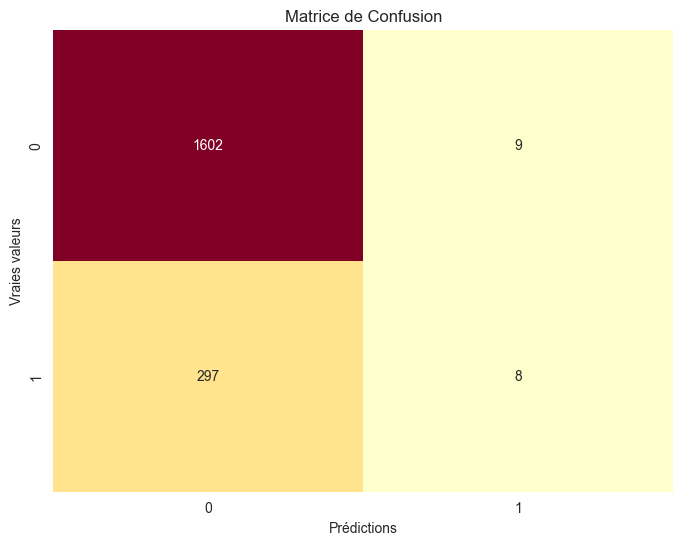

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculer la matrice de confusion pour les prédictions sur l'ensemble de test
conf_matrix = confusion_matrix(y_test, y_pred_test)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='YlOrRd', fmt='d', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()


In [39]:
accuracy_RF = accuracy_score(y_test, y_pred_test)
print(f"Accuracy du classifieur Random Forest : {accuracy_RF:.2f}")
precision_RF = precision_score(y_test, y_pred_test)
print(f"Précision du classifieur Random Forest: {precision_RF:.2f}")
recall_RF = recall_score(y_test, y_pred_test)
print(f"Rappel du classifieur Random Forest : {recall_RF:.2f}")
f1_RF = f1_score(y_test, y_pred_test)
print(f"F1 Score du classifieur Random Forest : {f1_RF:.2f}")

Accuracy du classifieur Random Forest : 0.84
Précision du classifieur Random Forest: 0.47
Rappel du classifieur Random Forest : 0.03
F1 Score du classifieur Random Forest : 0.05


# Classifieur Decision Tree

Précision sur l'ensemble d'entraînement : 0.85
Précision sur l'ensemble de test : 0.83


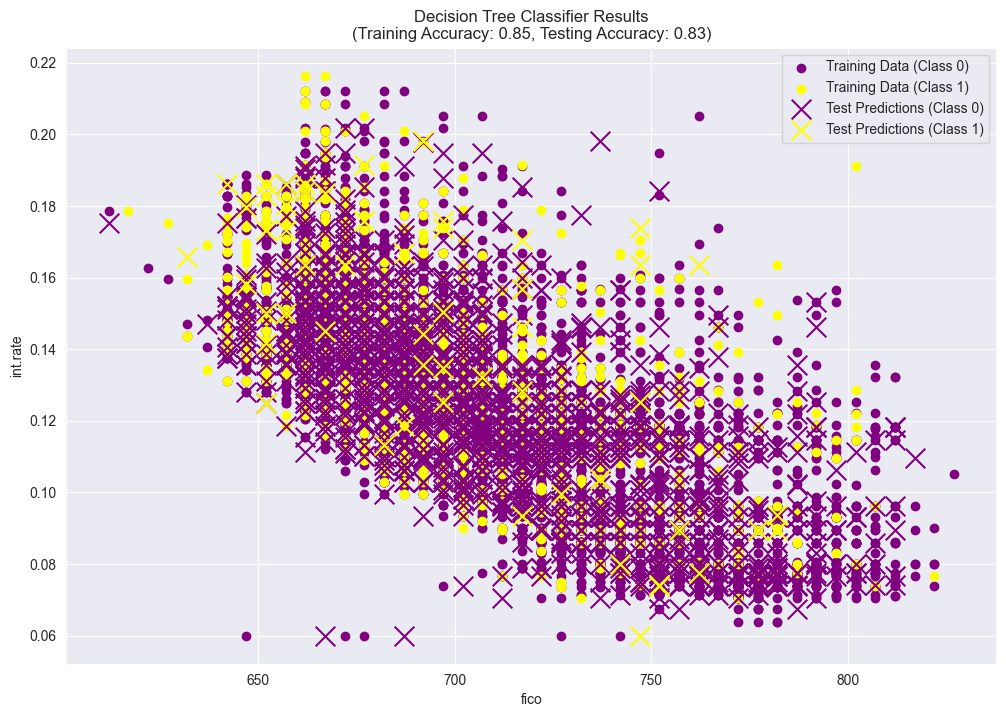

Train Accuracy score:  0.8533020099190812
Test Accuracy score: 0.8340292275574113


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

dt_clf = DecisionTreeClassifier(max_depth=7)
dt_clf.fit(X_train, y_train)

y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Précision sur l'ensemble d'entraînement : {train_accuracy:.2f}")
print(f"Précision sur l'ensemble de test : {test_accuracy:.2f}")
plt.figure(figsize=(12, 8))

# Plot Training Data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='purple', marker='o', label='Training Data (Class 0)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='yellow', marker='o', label='Training Data (Class 1)')

# Plot Test Predictions
plt.scatter(X_test[y_pred_test == 0, 0], X_test[y_pred_test == 0, 1], c='purple', marker='x', s=200, label='Test Predictions (Class 0)')
plt.scatter(X_test[y_pred_test == 1, 0], X_test[y_pred_test == 1, 1], c='yellow', marker='x', s=200, label='Test Predictions (Class 1)')

plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
plt.legend()
plt.title(f'Decision Tree Classifier Results\n(Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f})')
plt.show()



print('Train Accuracy score: ', train_accuracy)
print('Test Accuracy score:', test_accuracy)



Pour l'arbre de décision, le modèle semble généraliser assez bien, avec une précision de 0.85 sur l'ensemble d'entraînement et de 0.83 sur l'ensemble de test, indiquant une performance relativement équilibrée.

En revanche, pour la forêt tropicale, le modèle a une précision parfaite sur l'ensemble d'entraînement (1.00), mais sa performance diminue légèrement sur l'ensemble de test (0.84), suggérant un risque de surajustement aux données d'entraînement et une possible nécessité de régularisation.

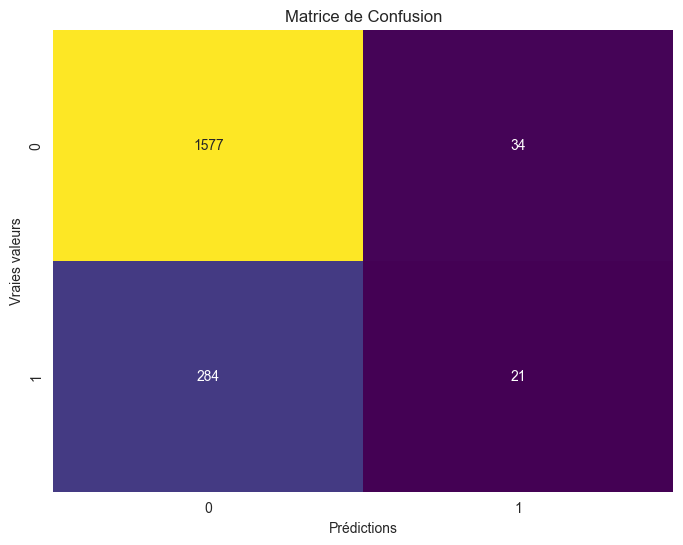

In [41]:
# Calcul de la matrice de confusion pour les prédictions sur l'ensemble de test
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()


In [42]:
accuracy_DT = accuracy_score(y_test, y_pred_test)
print(f"Accuracy du classifieur Decision Tree : {accuracy_DT:.2f}")
precision_DT = precision_score(y_test, y_pred_test)
print(f"Précision du classifieur Decision Tree: {precision_DT:.2f}")
recall_DT = recall_score(y_test, y_pred_test)
print(f"Rappel du classifieur Decision Tree : {recall_DT:.2f}")
f1_DT = f1_score(y_test, y_pred_test)
print(f"F1 Score du classifieur Decision Tree : {f1_DT:.2f}")

Accuracy du classifieur Decision Tree : 0.83
Précision du classifieur Decision Tree: 0.38
Rappel du classifieur Decision Tree : 0.07
F1 Score du classifieur Decision Tree : 0.12


# Classifieur Regression logistique

Cross-Validation Scores: [0.83953033 0.83626875 0.84007833 0.83877285 0.84007833]
Mean Accuracy: 0.8389457181348879
Standard Deviation of Accuracy: 0.0014215069600196284
Accuracy on Test Set: 0.84


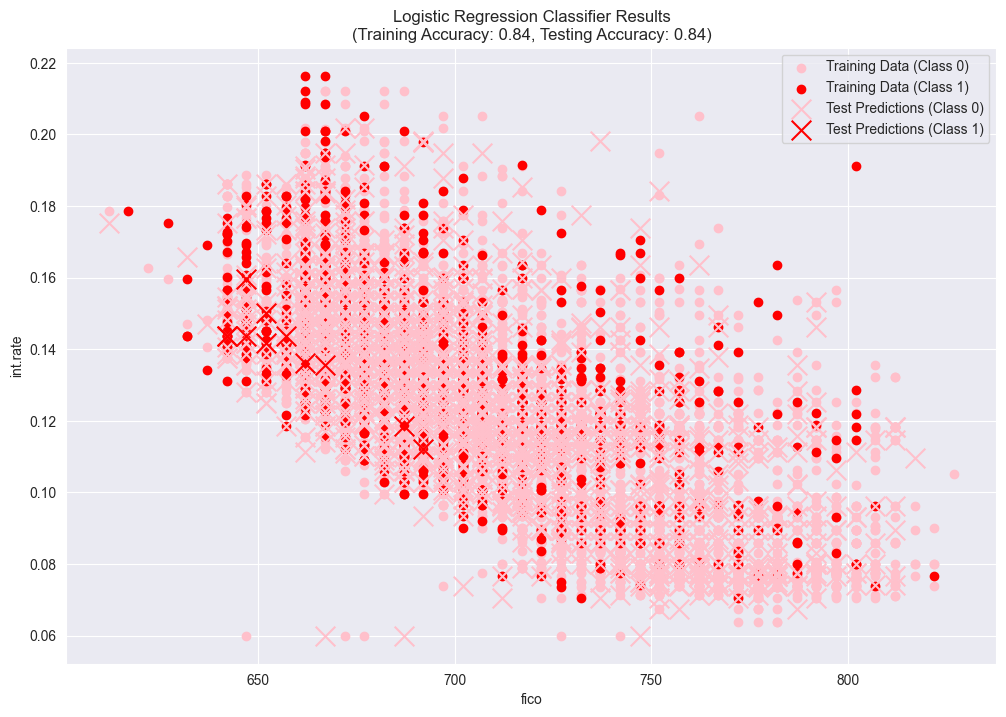

Train Accuracy score:  0.8389457181348879
Test Accuracy score: 0.8402922755741128


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

logistic_model = LogisticRegression(random_state=42)

# Performing 5-fold cross-validation
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')

# Displaying the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))

logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)

# Evaluation
test_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Set: {test_accuracy:.2f}")

#the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Representation of results
plt.figure(figsize=(12, 8))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='pink', marker='o', label='Training Data (Class 0)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', marker='o', label='Training Data (Class 1)')
plt.scatter(X_test[predictions == 0, 0], X_test[predictions == 0, 1], c='pink', marker='x', s=200, label='Test Predictions (Class 0)')
plt.scatter(X_test[predictions == 1, 0], X_test[predictions == 1, 1], c='red', marker='x', s=200, label='Test Predictions (Class 1)')

plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
plt.legend()
plt.title(f'Logistic Regression Classifier Results\n(Training Accuracy: {np.mean(cv_scores):.2f}, Testing Accuracy: {test_accuracy:.2f})')
plt.show()

print('Train Accuracy score: ', np.mean(cv_scores))
print('Test Accuracy score:', test_accuracy)



Pour la régression logistique, le modèle présente une performance cohérente entre l'ensemble d'entraînement (accuracy score : 0.84) et l'ensemble de test (accuracy score : 0.84), indiquant une généralisation stable sans surajustement significatif.

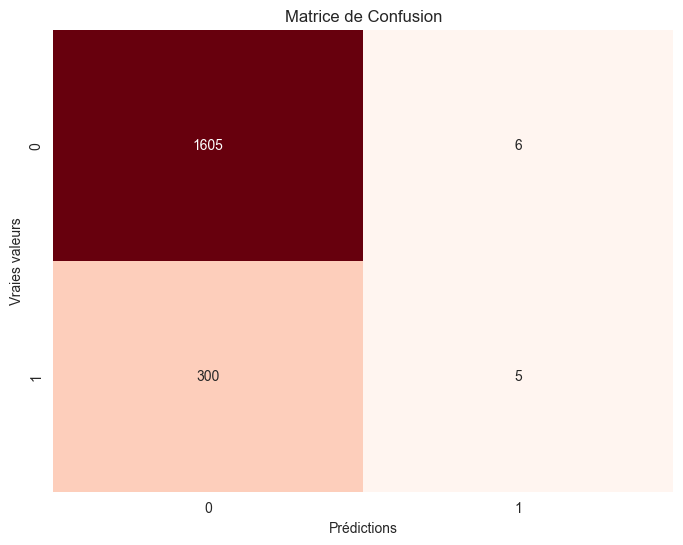

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()



In [45]:
accuracy_RL = accuracy_score(y_test, predictions)
print(f"Accuracy du classifieur Logistic Regression : {accuracy_RL:.2f}")
precision_RL = precision_score(y_test, predictions)
print(f"Précision du classifieur Logistic Regression: {precision_RL:.2f}")
recall_RL = recall_score(y_test, predictions)
print(f"Rappel du classifieur Logistic Regression : {recall_RL:.2f}")
f1_RL = f1_score(y_test, predictions)
print(f"F1 Score du classifieur Logistic Regression : {f1_RL:.2f}")

Accuracy du classifieur Logistic Regression : 0.84
Précision du classifieur Logistic Regression: 0.45
Rappel du classifieur Logistic Regression : 0.02
F1 Score du classifieur Logistic Regression : 0.03


**Comparaison en F1_Score**

Régression Logistique :
Précision relativement élevée, mais faible rappel. Pourrait être trop conservateur.

Random Forest :
Bon équilibre entre précision et rappel, ce qui en fait un choix potentiel.

Bayes :
Rappel élevé, mais précision modérée. Convient peut-être si l'accent est mis sur la détection des défauts.


Accuracy du classifieur k-NN : 0.79
Accuracy du classifieur bayes : 0.71
Accuracy du classifieur Random Forest : 0.84
Accuracy du classifieur Decision Tree : 0.83
Accuracy du classifieur Logistic Regression : 0.84


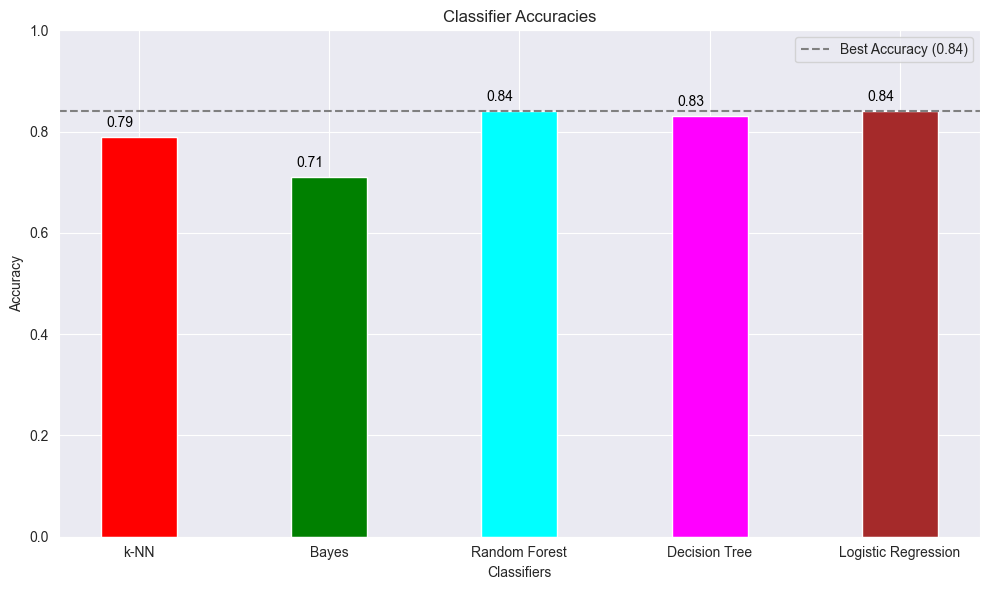

In [48]:
print(f"Accuracy du classifieur k-NN : {accuracy_KNN:.2f}")
print(f"Accuracy du classifieur bayes : {accuracy_B:.2f}")
print(f"Accuracy du classifieur Random Forest : {accuracy_RF:.2f}")
print(f"Accuracy du classifieur Decision Tree : {accuracy_DT:.2f}")
print(f"Accuracy du classifieur Logistic Regression : {accuracy_RL:.2f}")

classifiers = ['k-NN', 'Bayes', 'Random Forest', 'Decision Tree', 'Logistic Regression']
accuracies = [0.79, 0.71, 0.84, 0.83, 0.84]

best_accuracy = max(accuracies)

bar_width = 0.4
colors = ['red', 'green', 'cyan', 'magenta', 'brown']  # Assign different colors to each column

indices = np.arange(len(classifiers))

plt.figure(figsize=(10, 6))
bars = plt.bar(indices, accuracies, color=colors, width=bar_width)


plt.axhline(y=best_accuracy, color='gray', linestyle='--', label=f'Best Accuracy ({best_accuracy:.2f})')


for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center', color='black')

plt.ylim(0, 1)
plt.xticks(indices, classifiers)
plt.title('Classifier Accuracies')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


**Comparaison en accuracy**

En comparaison, les classifieurs Random Forest et Logistic Regression présentent les meilleures performances d'exactitude avec des scores respectifs de 0.84. Ces modèles semblent bien généraliser sur les ensembles de test. Le classifieur Decision Tree suit avec un score de 0.83, tandis que les classifieur K-NN (0.79) montre également de bonnes performances. En revanche, le classifieur bayes (0.71) a des scores d'exactitude inférieurs, indiquant une performance moindre sur les données de test.